<a href="https://colab.research.google.com/github/finerbrighterlighter/myanmar_covid19/blob/master/myanmar_compared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import seaborn as sns
from google.colab import files
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


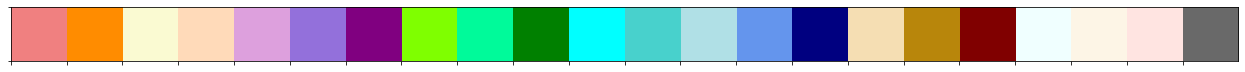

In [2]:
color_plan = ["lightcoral",
          "darkorange","lightgoldenrodyellow","peachpuff",
          "plum","mediumpurple","purple",
          "chartreuse","mediumspringgreen","green",
          "aqua","mediumturquoise",
          "powderblue","cornflowerblue","navy",
          "wheat","darkgoldenrod","maroon",
          "azure","oldlace","mistyrose","dimgray"]
sns.palplot(sns.color_palette(color_plan))

In [0]:
data = "https://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_iso3_regions.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bmain%2Bname%2C%23region%2Bsub%2Bcode%2C%23region%2Bsub%2Bname%2C%23region%2Bintermediate%2Bcode%2C%23region%2Bintermediate%2Bname&merge-replace02=on&merge-overwrite02=on&tagger-match-all=on&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv"

In [4]:
df_ori = pd.read_csv(data, header=0)
df_ori

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,...,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,24.0,24.0,40.0,40.0,74.0,84.0,94.0,110.0,110.0,120.0,170.0,174.0,237.0,273.0,281.0,299.0,349.0,367.0,423.0,444.0,484.0,521.0,555.0,607.0,665.0,714.0,784.0,840.0,906.0,933.0,996.0,1026.0,1092.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70.0,76.0,89.0,104.0,123.0,146.0,174.0,186.0,197.0,212.0,223.0,243.0,259.0,277.0,304.0,333.0,361.0,377.0,383.0,400.0,409.0,416.0,433.0,446.0,467.0,475.0,494.0,518.0,539.0,548.0,562.0,584.0,609.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,90.0,139.0,201.0,230.0,264.0,302.0,367.0,409.0,454.0,511.0,584.0,716.0,847.0,986.0,1171.0,1251.0,1320.0,1423.0,1468.0,1572.0,1666.0,1761.0,1825.0,1914.0,1983.0,2070.0,2160.0,2268.0,2418.0,2534.0,2629.0,2718.0,2811.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,88.0,113.0,133.0,164.0,188.0,224.0,267.0,308.0,334.0,370.0,376.0,390.0,428.0,439.0,466.0,501.0,525.0,545.0,564.0,583.0,601.0,601.0,638.0,646.0,659.0,673.0,673.0,696.0,704.0,713.0,717.0,717.0,AND,150,Europe,39,Southern Europe,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Saint Pierre and Miquelon,France,46.8852,-56.3159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,SPM,19,Americas,21,Northern America,NaN,NaN
261,NaN,South Sudan,6.877,31.307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,SSD,2,A

In [5]:
# countries of interest = China and Top Five countries with highest mortality 
# According to worldometer on 14/4/2020, it is US, Italy, Spain, France, and UK
#countries = ["China","US", "Italy", "Spain", "France", "United Kingdom"]
# Regional (ASEAN)
countries = ["Brunei","Cambodia","Indonesia","Laos","Malaysia","Philippines","Singapore","Thailand","Vietnam"]
# I will not be using Burma data here, since it is actually slightly incorrect.
df_countries = pd.DataFrame(countries, columns=["country"])

# merge
df_ori=df_countries.merge(df_ori.groupby(["Country/Region"]).sum(),left_on="country",right_on="Country/Region",indicator=False,how='left')
df_ori= df_ori.set_index(["country"])
df_ori


,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,...,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brunei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,40.0,50.0,54.0,56.0,68.0,75.0,78.0,83.0,88.0,91.0,104.0,109.0,114.0,115.0,120.0,126.0,127.0,129.0,131.0,133.0,134.0,135.0,135.0,135.0,135.0,135.0,135.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,137.0,138.0,138.0,138.0
Cambodia,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,7.0,7.0,7.0,33.0,35.0,37.0,51.0,53.0,84.0,87.0,91.0,96.0,96.0,99.0,99.0,103.0,107.0,109.0,109.0,110.0,114.0,114.0,114.0,114.0,115.0,117.0,119.0,119.0,120.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0
Indonesia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,96.0,117.0,134.0,172.0,227.0,311.0,369.0,450.0,514.0,579.0,686.0,790.0,893.0,1046.0,1155.0,1285.0,1414.0,1528.0,1677.0,1790.0,1986.0,2092.0,2273.0,2491.0,2738.0,2956.0,3293.0,3512.0,3842.0,4241.0,4557.0,4839.0,5136.0,5516.0,5923.0,6248.0,6575.0,6760.0,7135.0
Laos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,6.0,6.0,8.0,8.0,8.0,9.0,10.0,10.0,10.0,10.0,11.0,12.0,14.0,15.0,16.0,16.0,18.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
Malaysia,0.0,0.0,0.0,3.0,4.0,4.0,4.0,7.0,8.0,8.0,8.0,8.0,8.0,10.0,12.0,12.0,12.0,16.0,16.0,18.0,18.0,18.0,19.0,19.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,23.0,23.0,25.0,29.0,...,197.0,238.0,428.0,566.0,673.0,790.0,900.0,1030.0,1183.0,1306.0,1518.0,1624.0,1796.0,2031.0,2161.0,2320.0,2470.0,2626.0,2766.0,2908.0,3116.0,3333.0,3483.0,3662.0,3793.0,3963.0,4119.0,4228.0,4346.0,4530.0,4683.0,4817.0,4987.0,5072.0,5182.0,5251.0,5305.0,5389.0,5425.0,5482.0
Philippines,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,64.0,111.0,140.0,142.0,187.0,202.0,217.0,230.0,307.0,380.0,462.0,552.0,636.0,707.0,803.0,1075.0,1418.0,1546.0,2084.0,2311.0,2633.0,3018.0,3094.0,3246.0,3660.0,3764.0,3870.0,4076.0,4195.0,4428.0,4648.0,4932.0,5223.0,5453.0,5660.0,5878.0,6087.0,6259.0,6459.0,6599.0
Singapore,0.0,1.0,3.0,3.0,4.0,5.0,7.0,7.0,10.0,13.0,16.0,18.0,18.0,24.0,28.0,28.0,30.0,33.0,40.0,45.0,47.0,50.0,58.0,67.0,72.0,75.0,77.0,81.0,84.0,84.0,85.0,85.0,89.0,89.0,91.0,93.0,93.0,93.0,102.0,106.0,...,200.0,212.0,226.0,243.0,266.0,313.0,345.0,385.0,432.0,455.0,509.0,558.0,631.0,683.0,732.0,802.0,844.0,879.0,926.0,1000.0,1049.0,1114.0,1189.0,1309.0,1375.0,1481.0,1623.0,1910.0,2108.0,2299.0,2532.0,2918.0,3252.0,3699.0,4427.0,5050.0,5992.0,6588.0,8014.0,9125.0
Thailand,2.0,3.0,5.0,7.0,8.0,8.0,14.0,14.0,14.0,19.0,19.0,19.0,19.0,25.0,25.0,25.0,25.0,32.0,32.0,32.0,33.0,33.0,33.0,33.0,33.0,34.0,35.0,35.0,35.0,35.0,35.0,35.0

In [6]:
df=df_ori.T.reset_index()
df.rename(columns={"index": "date"}, inplace=True)
df["date"]=pd.to_datetime(df["date"].values)
df

country,date,Brunei,Cambodia,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,2.0
3,2020-01-25,0.0,0.0,0.0,0.0,3.0,0.0,3.0,7.0,2.0
4,2020-01-26,0.0,0.0,0.0,0.0,4.0,0.0,4.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...
86,2020-04-17,136.0,122.0,5923.0,19.0,5251.0,5878.0,5050.0,2700.0,268.0
87,2020-04-18,137.0,122.0,6248.0,19.0,5305.0,6087.0,5992.0,2733.0,268.0
88,2020-04-19,138.0,122.0,6575.0,19.0,5389.0,6259.0,6588.0,2765.0,268.0
89,2020-04-20,138.0,122.0,6760.0,19.0,5425.0,6459.0,8014.0,2792.0,268.0


In [0]:
# adding myanmar data
myanmar = "https://raw.githubusercontent.com/finerbrighterlighter/myanmar_covid19/master/mohs_announcement.csv"
df_myanmar = pd.read_csv(myanmar,header= 0)
df_myanmar["ann_date"] = pd.to_datetime(df_myanmar["ann_date"].values, dayfirst=True)

days_mm = pd.DataFrame(columns=["days","date"])
days_mm["days"] = np.arange(len(pd.date_range(start=df_myanmar.ann_date.min(), end=df_myanmar.ann_date.max())))
days_mm.loc[0,"date"]=df_myanmar.ann_date.min()
for i in range(1,len(days_mm)):
    days_mm.loc[i,"date"] = days_mm.loc[i-1,"date"] + pd.Timedelta(days=1)
    i=i+1
days_mm["date"] = pd.to_datetime(days_mm["date"])
days_mm=days_mm.merge(df_myanmar.groupby(["ann_date"]).size().to_frame("myanmar"),left_on="date",right_on="ann_date",indicator=False,how='left')
days_mm["myanmar"].fillna(0, inplace=True)
days_mm["date"] = pd.to_datetime(days_mm["date"])
days_mm["myanmar"]=days_mm["myanmar"].astype(int)
days_mm["myanmar"]=days_mm["myanmar"].cumsum().astype(int)
days_mm["days"]=days_mm["days"]+1

In [0]:
days = list(range(1, len(days_mm)+1))
days = pd.DataFrame(days, columns=["day"])

In [0]:
# brunei - day 1 (9/3/2020)
df_bru = df.loc[47:, "Brunei"].reset_index(drop=True).to_frame("brunei")
days_bru = days.merge(df_bru, how="left", indicator=False, left_index=True, right_index=True)

# cambodia - day 1 (27/1/2020)
df_cam = df.loc[5:, "Cambodia"].reset_index(drop=True).to_frame("cambodia")
days_cam = days.merge(df_cam, how="left", indicator=False, left_index=True, right_index=True)

# indonesia - day 1 (2/3/2020)
df_indo = df.loc[40:, "Indonesia"].reset_index(drop=True).to_frame("indonesia")
days_indo = days.merge(df_indo, how="left", indicator=False, left_index=True, right_index=True)

# laos - day 1 (24/3/2020)
# laos is one day late for first discovery than Myanmar. last date is filled with ffill
df_laos = df.loc[61:, "Laos"].reset_index(drop=True).to_frame("laos")
days_laos = days.merge(df_laos, how="left", indicator=False, left_index=True, right_index=True)
days_laos["laos"]=days_laos["laos"].fillna(method='ffill')

# malaysia - day 1 (25/1/2020)
df_malay = df.loc[3:, "Malaysia"].reset_index(drop=True).to_frame("malaysia")
days_malay = days.merge(df_malay, how="left", indicator=False, left_index=True, right_index=True)

# philippines - day 1 (30/1/2020)
df_philip = df.loc[8:, "Philippines"].reset_index(drop=True).to_frame("philippines")
days_philip = days.merge(df_philip, how="left", indicator=False, left_index=True, right_index=True)

# singapore - day 1 (23/1/2020)
df_sg = df.loc[1:, "Singapore"].reset_index(drop=True).to_frame("singapore")
days_sg = days.merge(df_sg, how="left", indicator=False, left_index=True, right_index=True)

# thailand - day 1 (22/1/2020)
days_th = days.merge(df["Thailand"], how="left", indicator=False, left_index=True, right_index=True)

# vietnam - day 1 (23/1/2020)
df_viet = df.loc[1:, "Vietnam"].reset_index(drop=True).to_frame("vietnam")
days_viet = days.merge(df_viet, how="left", indicator=False, left_index=True, right_index=True)

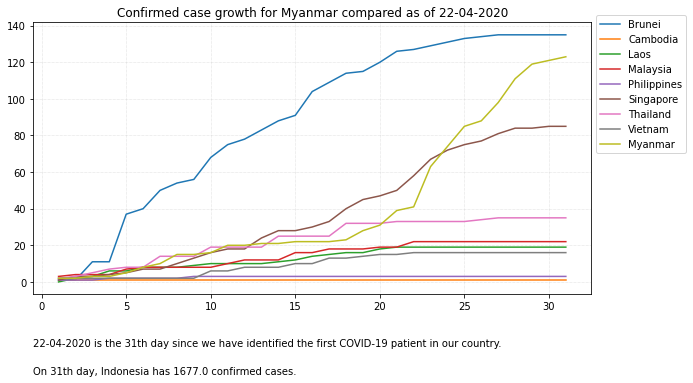

In [10]:
# plot

fig, ax = plt.subplots(figsize=(10,5))
ax.grid(linestyle=':', linewidth='0.5', color='silver')
ax.set_axisbelow(True)
sns.color_palette(color_plan)

#plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
#plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10))

brunei = plt.plot(days, days_bru["brunei"])
cambodia = plt.plot(days, days_cam["cambodia"])
#indonesia = plt.plot(days, days_indo["indonesia"])
laos = plt.plot(days, days_laos["laos"])
malaysia = plt.plot(days, days_malay["malaysia"])
philippines = plt.plot(days, days_philip["philippines"])
singapore = plt.plot(days, days_sg["singapore"])
thailand = plt.plot(days, days_th["Thailand"])
vietnam = plt.plot(days, days_viet["vietnam"])
myanmar = plt.plot(days_mm["days"], days_mm["myanmar"])


plt.title("Confirmed case growth for Myanmar compared as of "+str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d-%m-%Y")))
plt.legend((brunei[0],cambodia[0],laos[0],malaysia[0],philippines[0],singapore[0],thailand[0],vietnam[0],myanmar[0]), 
           ("Brunei ", "Cambodia", "Laos", "Malaysia", "Philippines", "Singapore", "Thailand", "Vietnam", "Myanmar"),
           loc="lower left", bbox_to_anchor=(1, 0.5))
plt.text(0, -0.2,str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d-%m-%Y"))+" is the "+str(len(days_mm))+"th day since we have identified the first COVID-19 patient in our country.", horizontalalignment="left", verticalalignment="bottom", transform=ax.transAxes)

plt.text(0, -0.3,"On "+str(len(days_mm))+"th day, Indonesia has "+ str(days_indo.loc[len(days_mm)-1,"indonesia"])+" confirmed cases.", horizontalalignment="left", verticalalignment="bottom", transform=ax.transAxes)

cases = str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d-%m-%Y"))+"_comparison.svg"
plt.savefig(cases, bbox_inches = "tight")
plt.show()
files.download(cases)

In [11]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.
